# Temperature Forecast Project using ML

Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.utils import shuffle
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("temperature.csv")
pd.set_option("display.max_columns",None)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


The dataset contains the details of summer temperature data. In the dataset there are two target columns, one is Next_Tmax and Next_Tmin. Since both the output attributes are continuous in nature so it termed to be a Regression Type problem.

# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(7752, 25)

The dataset contains 7752 rows and 25 columns.



In [6]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64
**************************************************
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64
**************************************************
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
**************************************************
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7    

There are several missing values present in many columns. We will use appropriate imputation methods to fill the null values.

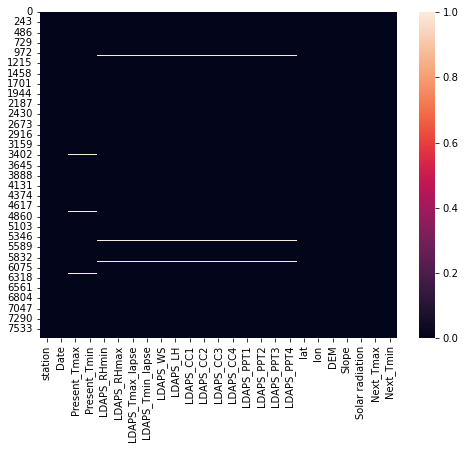

In [7]:
#Let's visualize the null values clearly
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

# Treating null values

In [8]:
# Checking unique values in station column
df["station"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [9]:
#lets check the unique values in Date column
df['Date'].unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '10-08-2013', '11-08-2013', '12-08-2013',
       '13-08-2013', '14-08-2013', '15-08-2013', '16-08-2013',
       '17-08-2013', '18-08-2013', '19-08-2013', '20-08-2013',
       '21-08-2013', '22-08-2013', '23-08-2013', '24-08-2013',
       '25-08-2013', '26-08-2013', '27-08-2013', '28-08-2013',
       '29-08-2013', '30-08-2013', '30-06-2014', '01-07

So it looks like the data is collected for about 25 stations and the last 2 entries are having nan values,so i can replace them with station 1 and 2 considering the entries of next day.And the nan value in Date column can be replaced by continuation of dates like 31-08-2017.

In [10]:
# Lets replace the null values in station column
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [11]:
#lets replace null values in 'Date' column
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [12]:
# Checking skewness 
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

Using Imputaion method to replace nan values:


In [13]:
# Checking mean values of the columns.
print("The mean of Present_Tmax is:",df["Present_Tmax"].mean())  # we will fill the null values using its mean values
print("The mean of Present_Tmin is:",df["Present_Tmin"].mean())
print("The mean of LDAPS_RHmin is:",df["LDAPS_RHmin"].mean())
print("The mean of LDAPS_Tmax_lapse  is:",df["LDAPS_Tmax_lapse"].mean())
print("The mean of LDAPS_CC1  is:",df["LDAPS_CC1"].mean())
print("The mean of LDAPS_CC2 is:",df["LDAPS_CC2"].mean())
print("The mean of Next_Tmax is:",df["Next_Tmax"].mean())
print("The mean of Next_Tmin is:",df["Next_Tmin"].mean())

The mean of Present_Tmax is: 29.76821140328037
The mean of Present_Tmin is: 23.22505857849521
The mean of LDAPS_RHmin is: 56.75937215069287
The mean of LDAPS_Tmax_lapse  is: 29.613446542813577
The mean of LDAPS_CC1  is: 0.36877358559828194
The mean of LDAPS_CC2 is: 0.35608043728396527
The mean of Next_Tmax is: 30.274886731391593
The mean of Next_Tmin is: 22.93222006472492


In [14]:
# Filling missing values in the above columns using mean method 
cols = ["Present_Tmax", "Present_Tmin","LDAPS_RHmin","LDAPS_Tmax_lapse","LDAPS_CC1","LDAPS_CC2","Next_Tmax","Next_Tmin"]

for x in cols:
    df[x] = df[x].replace(np.nan, df[x].mean())

Here we have replaced NAN values present in the columns with their respective mean values.

In [15]:
# Checking median values of the columns having outliers
print("The median of LDAPS_RHmax is:",df["LDAPS_RHmax"].median())  # we will fill the null values using its median values
print("The median of LDAPS_Tmin_lapse is:",df["LDAPS_Tmin_lapse"].median())
print("The median of LDAPS_WS is:",df["LDAPS_WS"].median())
print("The median of LDAPS_LH  is:",df["LDAPS_LH"].median())
print("The median of LDAPS_CC3  is:",df["LDAPS_CC3"].median())
print("The median of LDAPS_CC4 is:",df["LDAPS_CC4"].median())
print("The median of LDAPS_PPT1 is:",df["LDAPS_PPT1"].median())
print("The median of LDAPS_PPT2 is:",df["LDAPS_PPT2"].median())
print("The median of LDAPS_PPT3 is:",df["LDAPS_PPT3"].median())
print("The median of LDAPS_PPT4 is:",df["LDAPS_PPT4"].median())

The median of LDAPS_RHmax is: 89.79347992
The median of LDAPS_Tmin_lapse is: 23.76019884
The median of LDAPS_WS is: 6.547470301
The median of LDAPS_LH  is: 56.86548154
The median of LDAPS_CC3  is: 0.262554604
The median of LDAPS_CC4 is: 0.227664469
The median of LDAPS_PPT1 is: 0.0
The median of LDAPS_PPT2 is: 0.0
The median of LDAPS_PPT3 is: 0.0
The median of LDAPS_PPT4 is: 0.0


In [16]:
col= ["LDAPS_RHmax", "LDAPS_Tmin_lapse", "LDAPS_WS", "LDAPS_LH", "LDAPS_CC3", "LDAPS_CC4", "LDAPS_PPT1", "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4"]
for i in col:
    df[i] = df[i].replace(np.nan, df[i].median())

We have filled all the null values present in the columns using mean and median values. Let's check the null values again to confirm it.

In [17]:
# Ckecking null values again
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We can observe that there are no missing values present in any of the columns.

In some observation we can notice that the dataset are orderly arranged by "Date" and "station" columns so we will shuffle the dataset to avoid the problem while building the models and to get better results.

In [18]:
#lets shuffle the dataset
df = shuffle(df)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
843,19.0,02-08-2013,28.4,24.2,69.021774,89.449890,29.019588,26.648549,8.263515,35.936475,0.471469,0.322900,0.384341,0.258570,0.535152,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5407.366699,32.5,25.9
912,13.0,05-08-2013,29.8,26.8,76.749825,92.316734,30.517108,26.076250,6.408564,48.185790,0.248862,0.437526,0.508867,0.135038,0.000000,0.143656,0.764289,0.000000,37.5776,127.083,59.8324,2.6865,5283.324219,28.3,22.9
1876,2.0,13-07-2014,29.1,21.6,46.896816,88.974609,29.707601,23.200683,7.310947,57.162059,0.238007,0.130544,0.000054,0.000000,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5753.916504,30.6,20.4
432,8.0,17-07-2013,26.4,23.4,73.263000,93.741669,27.162298,24.438185,5.884680,25.986054,0.569781,0.618961,0.613701,0.299167,0.035559,0.098596,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5689.650879,28.5,23.9
7434,10.0,18-08-2017,28.7,21.7,53.745548,89.897064,29.254749,22.046702,6.685997,60.447960,0.220522,0.272913,0.462178,0.480357,0.000000,0.000000,0.880885,0.000000,37.4562,126.955,208.5070,5.1782,4843.271973,27.8,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,19.0,21-07-2017,31.8,26.7,67.389046,88.161217,30.679725,26.956897,6.570997,35.638811,0.468705,0.511895,0.566654,0.357152,0.000000,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5659.175293,32.8,26.3
4770,21.0,04-07-2016,24.1,21.2,86.573532,95.031898,26.799083,20.428126,9.402985,44.157577,0.915553,0.944783,0.828596,0.699816,2.101894,1.069522,0.971625,1.482267,37.5507,127.040,26.2980,0.5721,5826.782227,25.8,20.6
5332,8.0,27-07-2016,28.9,26.6,62.166817,95.086617,29.140972,23.855082,7.117721,53.746234,0.587029,0.581732,0.100016,0.036852,0.942805,0.834895,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5483.880859,30.5,25.8
4934,10.0,11-07-2016,32.5,21.9,71.017380,92.580757,25.959637,22.081776,5.039087,66.292151,0.760669,0.379364,0.658193,0.463976,0.604613,0.000000,0.300860,0.753165,37.4562,126.955,208.5070,5.1782,5778.769531,29.7,21.3


In [19]:
# Checking the type of dataset
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [20]:
# Converting Date  column from object type to Datetime Type
df['Date']=pd.to_datetime(df['Date'])

In [21]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

We have converted Date column data type from object to datetime type.

In [22]:

# Extracting Day from Date column
df["Day"] = df["Date"].dt.day

# Extracting Month from Date column
df["Month"] = df["Date"].dt.month

# Extracting Year from Date column
df["Year"] = df["Date"].dt.year

Now we have extracted Day, Month and Year from Date column so we can drop this column as it is of no use.

In [23]:
# Dropping Date column
df.drop("Date",axis=1,inplace=True)

In [24]:
df.head()


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
843,19.0,28.4,24.2,69.021774,89.449890,29.019588,26.648549,8.263515,35.936475,0.471469,0.322900,0.384341,0.258570,0.535152,0.000000,0.000000,0.0,37.5776,126.938,75.0924,1.7678,5407.366699,32.5,25.9,8,2,2013
912,13.0,29.8,26.8,76.749825,92.316734,30.517108,26.076250,6.408564,48.185790,0.248862,0.437526,0.508867,0.135038,0.000000,0.143656,0.764289,0.0,37.5776,127.083,59.8324,2.6865,5283.324219,28.3,22.9,8,5,2013
1876,2.0,29.1,21.6,46.896816,88.974609,29.707601,23.200683,7.310947,57.162059,0.238007,0.130544,0.000054,0.000000,0.000000,0.000000,0.000000,0.0,37.6046,127.032,44.7624,0.5141,5753.916504,30.6,20.4,13,7,2014
432,8.0,26.4,23.4,73.263000,93.741669,27.162298,24.438185,5.884680,25.986054,0.569781,0.618961,0.613701,0.299167,0.035559,0.098596,0.000000,0.0,37.4697,126.910,52.5180,1.5629,5689.650879,28.5,23.9,17,7,2013
7434,10.0,28.7,21.7,53.745548,89.897064,29.254749,22.046702,6.685997,60.447960,0.220522,0.272913,0.462178,0.480357,0.000000,0.000000,0.880885,0.0,37.4562,126.955,208.5070,5.1782,4843.271973,27.8,20.8,18,8,2017


We have extracted Day, Month and Year from Date column and dropped Date the column.

In [25]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 843 to 1534
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float6

This gives the information about the dataset which includes indexing type, column type, non-null values and memory usage. Here we can observe all the columns have float data type except Day, Month and Year which have integer data type..

In [26]:
# Checking number of unique values in each column
df.nunique()

station               25
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
Day                   21
Month                 12
Year                   5
dtype: int64

These are the number of unique values present in each columns.

In [27]:
# Checking how many columns are there in the dataset
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [28]:
# Checking the list of counts of Next_Tmax
df['Next_Tmax'].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
21.8      1
37.3      1
37.6      1
18.6      1
19.7      1
Name: Next_Tmax, Length: 184, dtype: int64

These are the value counts of the target Next_Tmax.

In [29]:
# Checking the list of counts of Next_Tmin
df['Next_Tmin'].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.4      1
12.9      1
29.0      1
13.9      1
14.9      1
Name: Next_Tmin, Length: 158, dtype: int64

These are the value counts of the target Next_Tmin.



# Description of Dataset

In [30]:
# Statistical summary of dataset
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.997033,29.768211,23.225059,56.759372,88.388529,29.613447,23.514984,7.092549,62.450457,0.368774,0.356080,0.317864,0.298499,0.586267,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,16.374742,7.080882,2015.000516
std,7.213007,2.956557,2.403036,14.596973,7.158471,2.932898,2.334099,2.173913,33.571540,0.261185,0.256810,0.249208,0.253211,1.937198,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,8.243617,2.238124,1.414487
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.313244,89.793480,29.662273,23.760199,6.547470,56.865482,0.320110,0.315667,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.049122,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


The counts of columns are same which means there are no missing values present in the dataset.

In most of the columns, mean is greater than the median(50%) which means they are skewed to right.

Some columns like LDAPS_RHmax, Solar radiation etc, have median value bit greater than the mean value hence they are skewed to left.

Also the columns like Station, Present_Tmax, lon, lat etc, have almost same mean and median values that means the data is normal and symmetric also they have no skewness.

# Data Visualization
Univariate Analysis

In [31]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


There is no categorical column in the dataset.



In [32]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year']


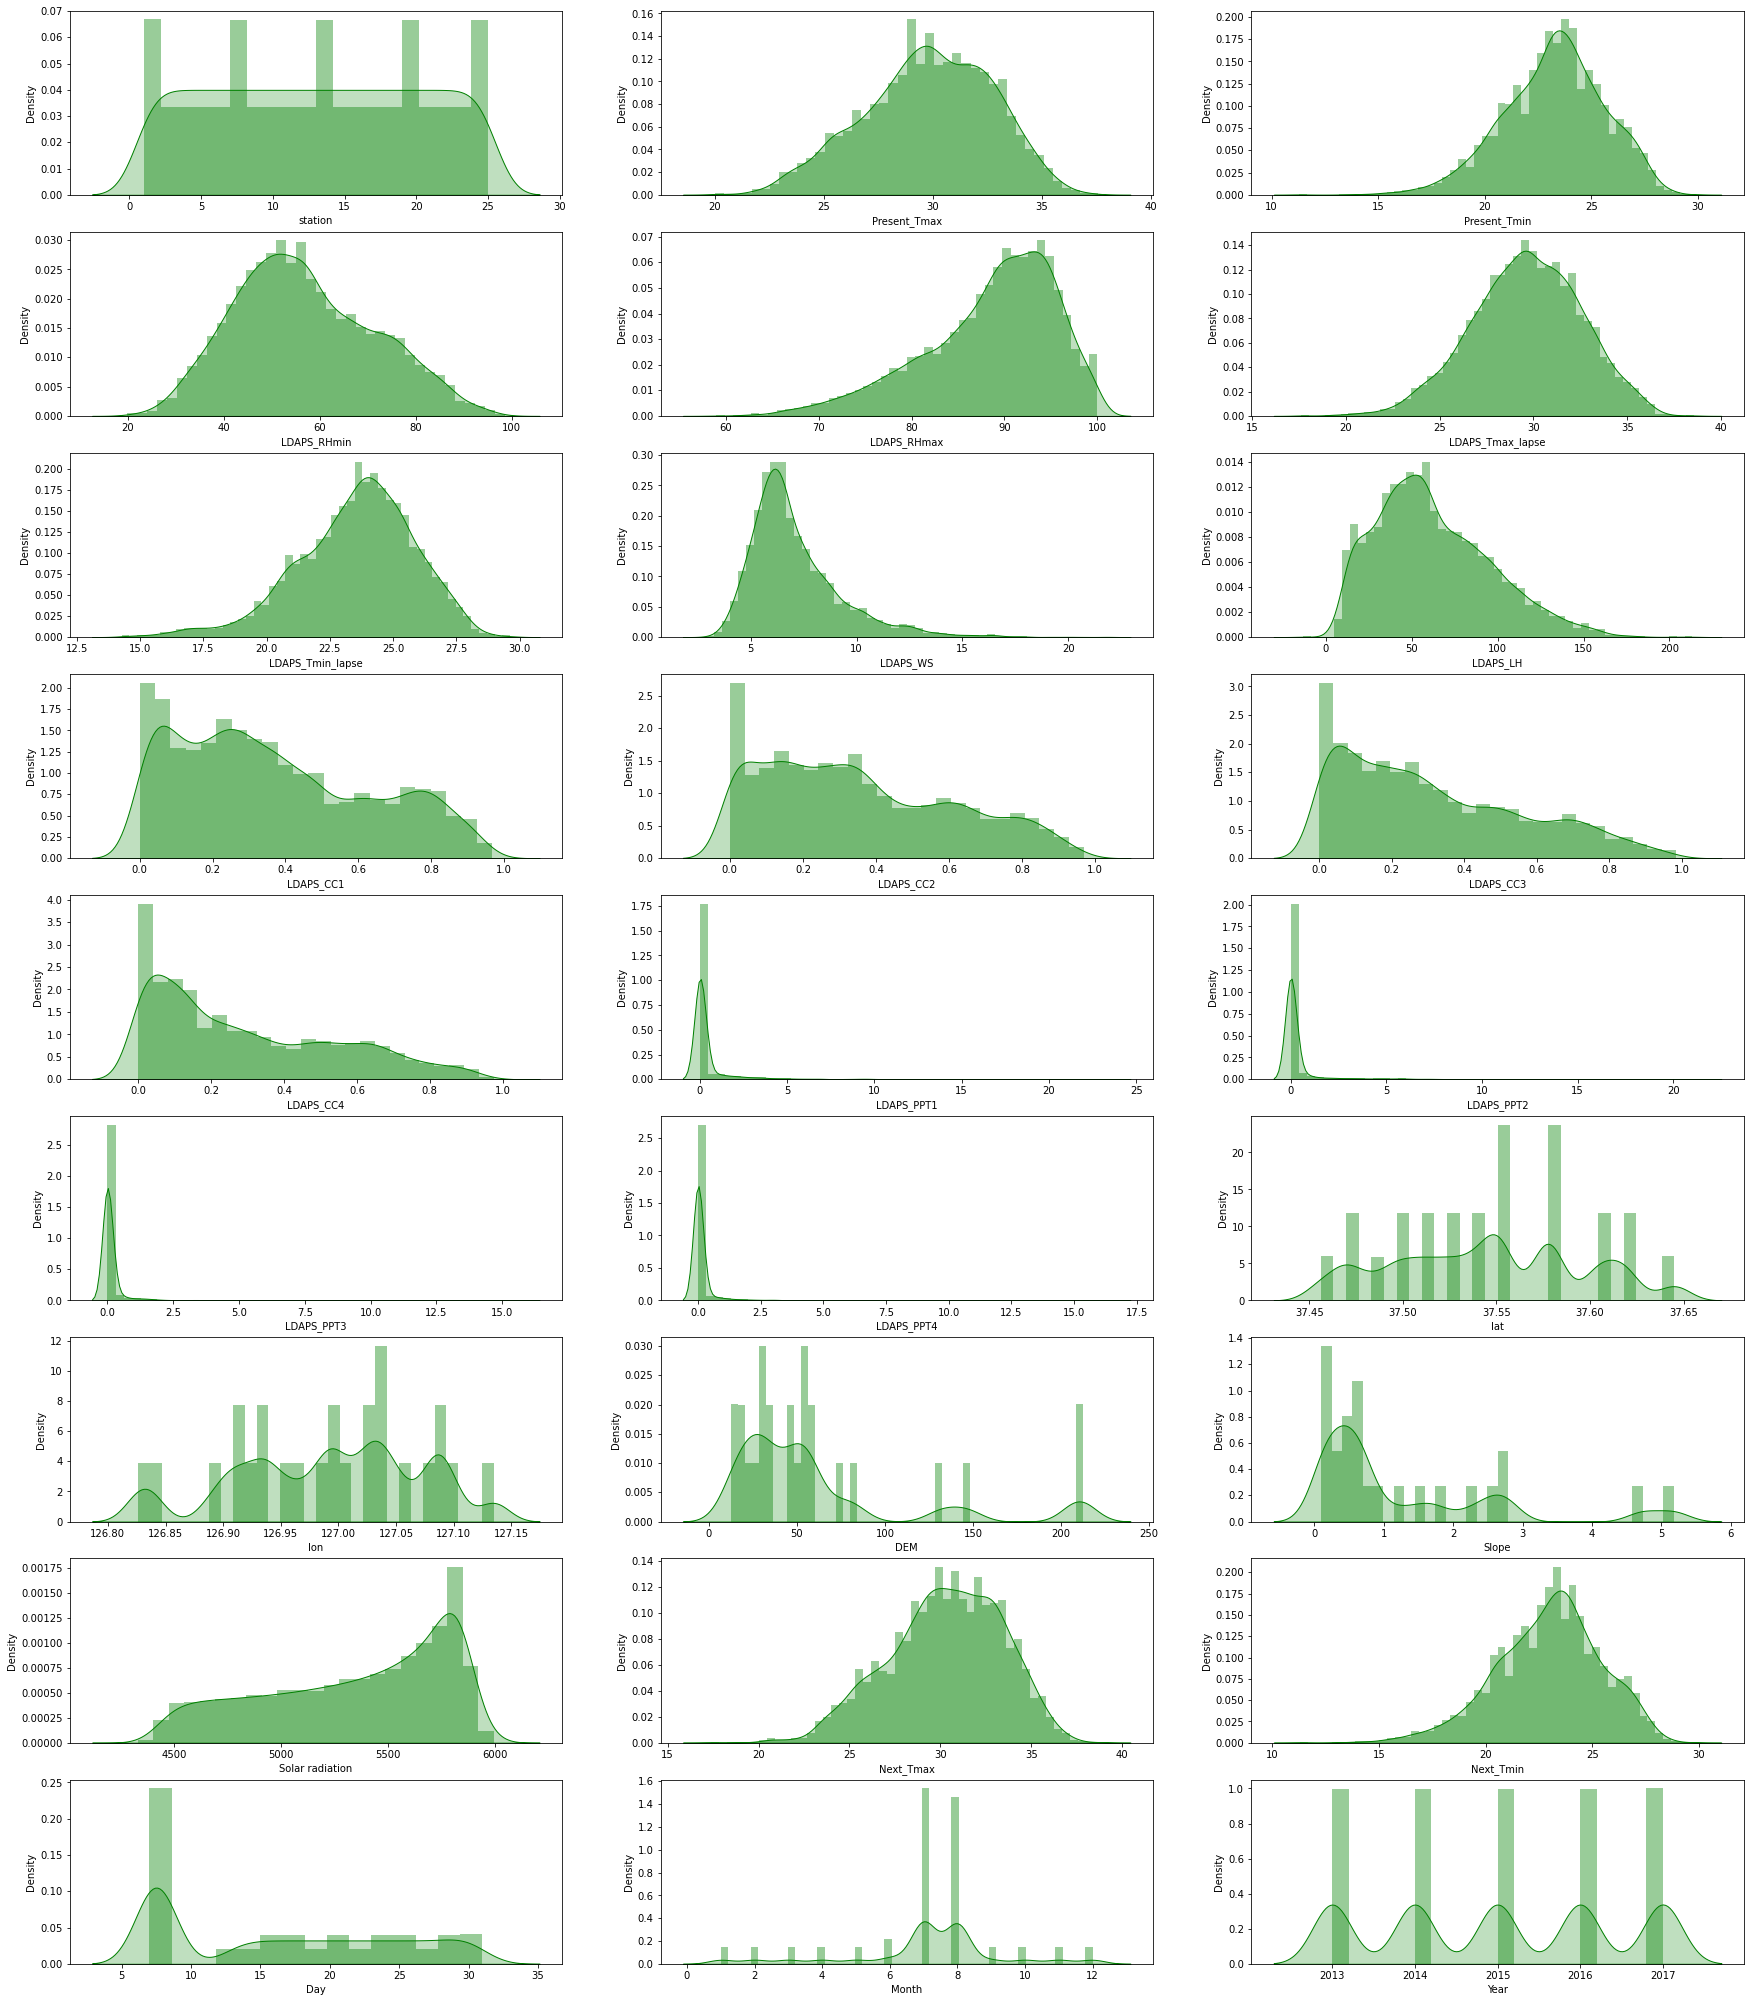

In [33]:
#Distribution plot for all numerical columns
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in df[numerical_columns]:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column],color='g',kde_kws={"shade": True},hist=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Bivariate Analysis

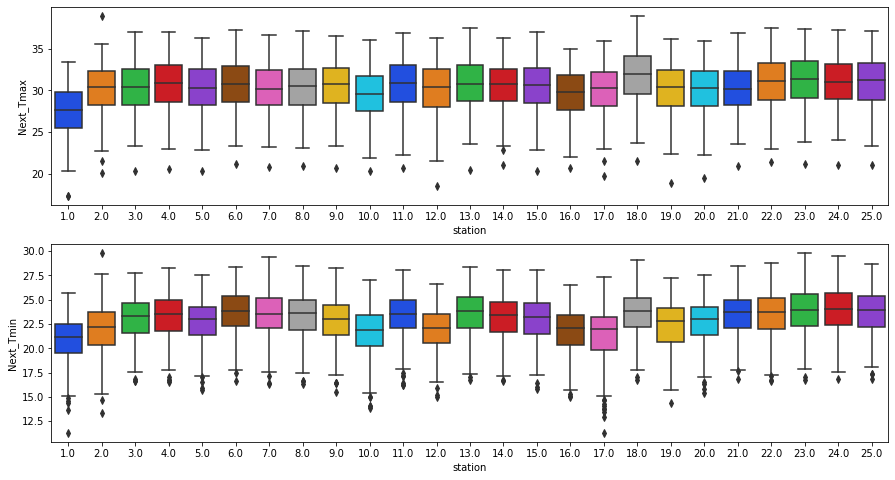

In [34]:
# Visualizing the relation between station and the target variables
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df["Next_Tmax"],data=df,palette="bright")
plt.subplot(2,1,2)
sns.boxplot(df['station'],df["Next_Tmin"],data=df,palette="bright")
plt.show()

From the box plot we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets while station 1 observes lowest temperature for both the targets.

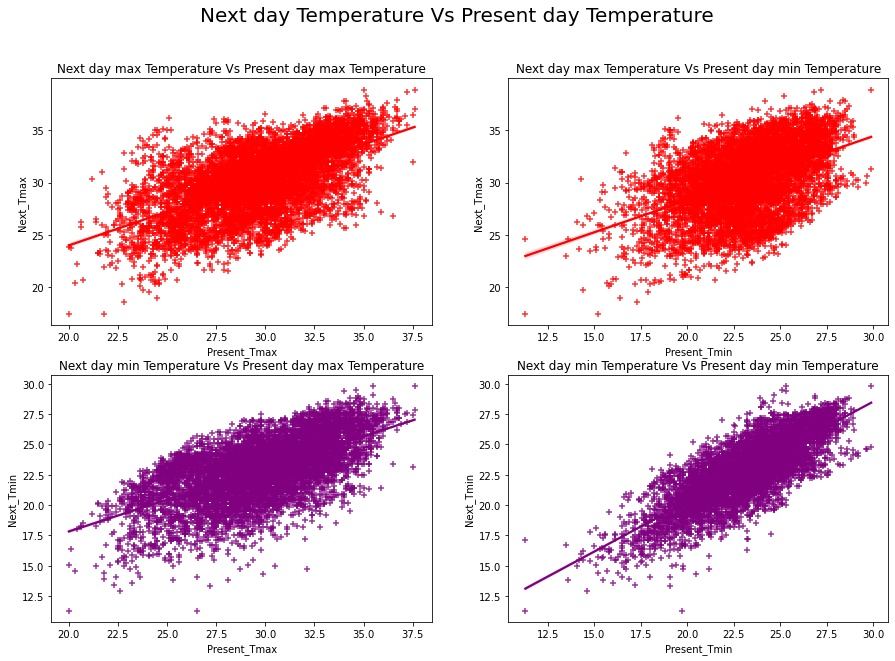

In [35]:
plt.figure(figsize=(15,10))
plt.suptitle('Next day Temperature Vs Present day Temperature',fontsize=20)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df,marker="+",color='r')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df,marker="+",color='r')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df,marker="+",color='purple')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df,marker="+",color="purple")
plt.show()


There is a strong linear relationship between the Next day temperature and Present day temperature.

As Present day Tmax and Tmin increases then Next_Tmin and Next_Tmax temperature also increases

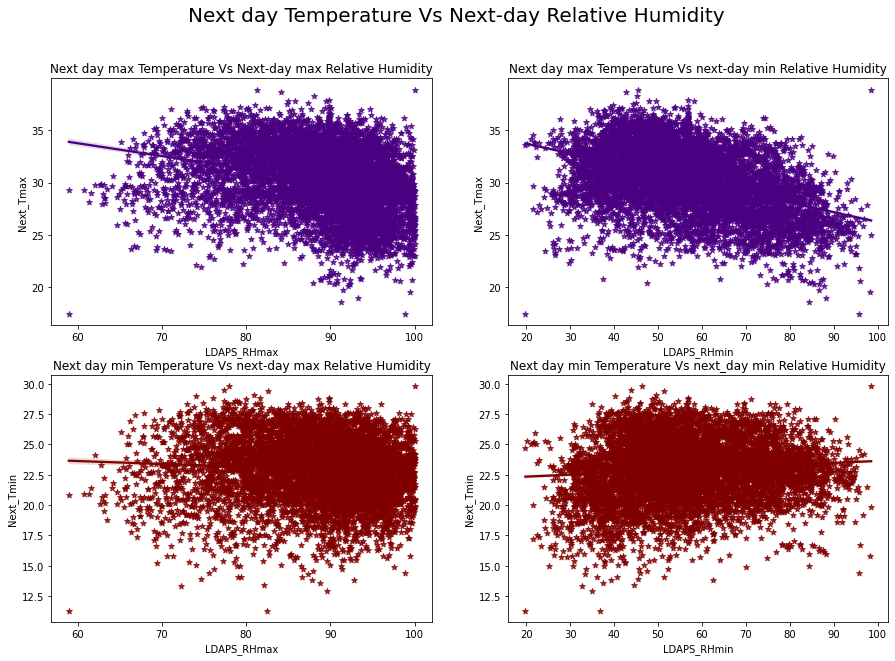

In [36]:
# Comparing Next day temperature and next day Relative Humidity

plt.figure(figsize=(15,10))
plt.suptitle('Next day Temperature Vs Next-day Relative Humidity',fontsize=20)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=df,marker="*",color='indigo')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=df,marker="*",color='indigo')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmin',data=df,marker="*",color='maroon')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=df,marker="*",color="maroon")
plt.show()

The columns LDAPS_RHmax and LDAPS_RHmin contains the forecast of next-day maximum and minimum Relative humidity in percentage(%) respectively.

Next day Tmax decreases with increase in LDAPS_RHmax and LDAPS_RHmin but it is not true in case of Next_Tmin, as Next day Tmin seems to be unaffected by RHmax and we can also observe slight positive correlation between Next_Tmin and RHmin

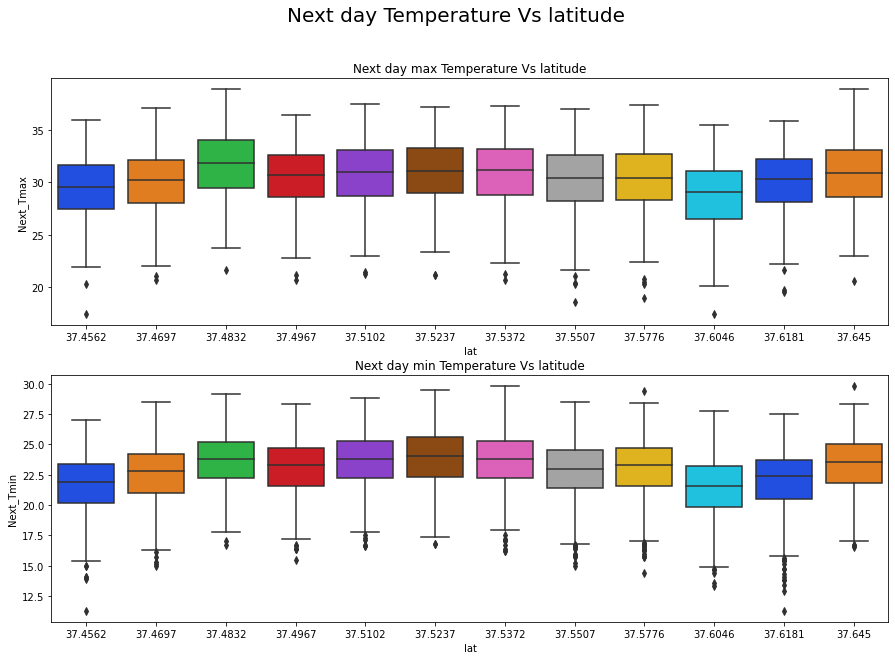

In [37]:

# Comparing Next day temperature and latitude

plt.figure(figsize=(15,10))
plt.suptitle('Next day Temperature Vs latitude',fontsize=20)

plt.subplot(2,1,1)
plt.title('Next day max Temperature Vs latitude')
sns.boxplot(x='lat',y='Next_Tmax',data=df,palette="bright")

plt.subplot(2,1,2)
plt.title('Next day min Temperature Vs latitude')
sns.boxplot(x='lat',y='Next_Tmin',data=df,palette="bright")
plt.show()

The highest temperature is observed at latitude range 37.4832 for Next_Tmax but this is not the case for Next_Tmin, that could be because of other factors affect the temperature

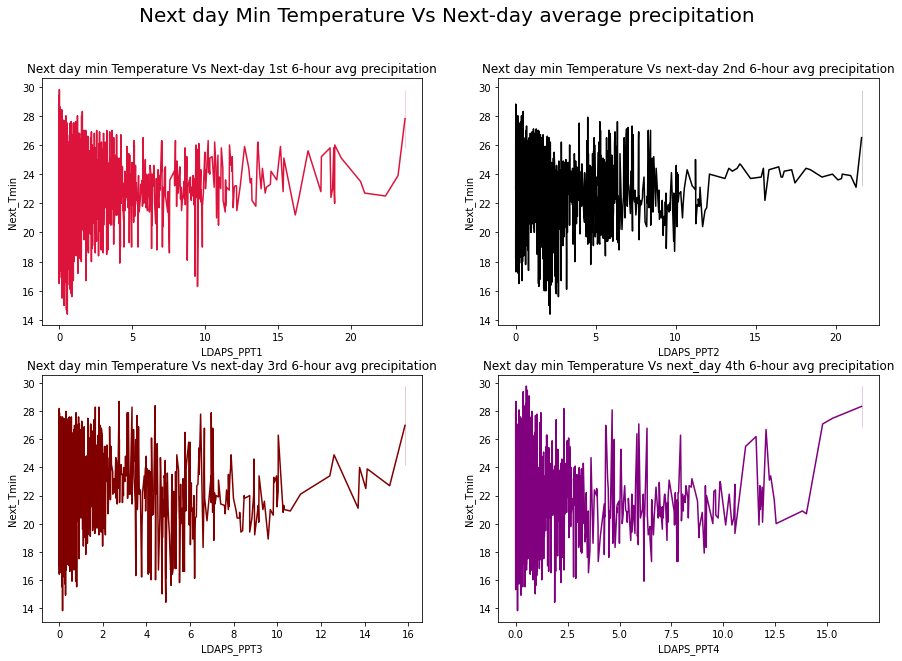

In [38]:
# Comparing Next day minimum temperature and next day average precipitation

plt.figure(figsize=(15,10))
plt.suptitle('Next day Min Temperature Vs Next-day average precipitation',fontsize=20)

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour avg precipitation')
sns.lineplot(x='LDAPS_PPT1',y='Next_Tmin',data=df,color="crimson")

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour avg precipitation')
sns.lineplot(x='LDAPS_PPT2',y='Next_Tmin',data=df,color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour avg precipitation')
sns.lineplot(x='LDAPS_PPT3',y='Next_Tmin',data=df,color='maroon')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour avg precipitation')
sns.lineplot(x='LDAPS_PPT4',y='Next_Tmin',data=df,color="purple")
plt.show()

There is no linear relation between average precipitation and Next day temperature.

Next_Tmin slightly increases as average precipitation increases.

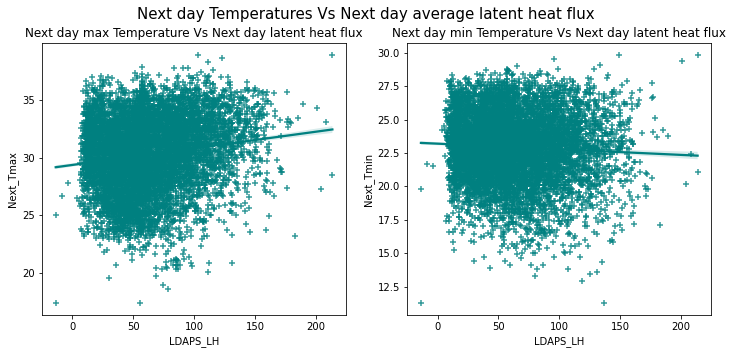

In [39]:
# Comparing Next day temperature and  Next day Average latent heat flux (W/m2)

plt.figure(figsize=(12,5))
plt.suptitle('Next day Temperatures Vs Next day average latent heat flux',fontsize=15)

plt.subplot(1,2,1)
plt.title('Next day max Temperature Vs Next day latent heat flux') 
sns.regplot(x='LDAPS_LH',y='Next_Tmax',data=df,marker='+',color="teal")

plt.subplot(1,2,2)
plt.title('Next day min Temperature Vs Next day latent heat flux') 
sns.regplot(x='LDAPS_LH',y='Next_Tmin',data=df,marker='+',color="teal")
plt.show()

LDAPS_LH gives the forecast of next-day average latent heat flux (W/m2).

From the plot we can notice there is no linear relation between targets and the features.

As Latent heat flux increases, Next day Tmax is also increases slightly while Next day Tmin decreases.

The Latent heat flux mostly distributed in the range of 10 to 160 W/m2.

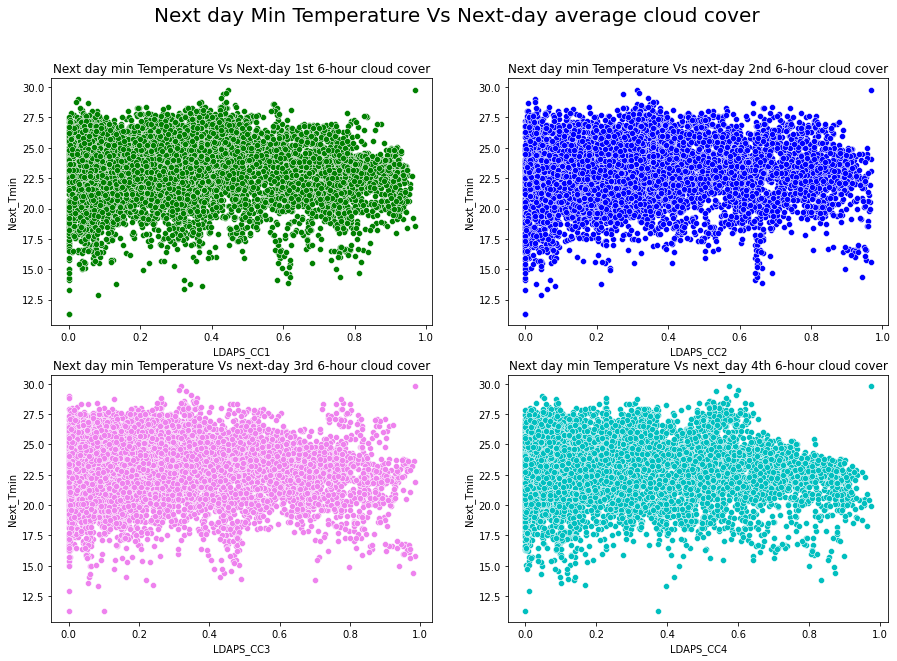

In [40]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(15,10))
plt.suptitle('Next day Min Temperature Vs Next-day average cloud cover',fontsize=20)

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="c")
plt.show()

There is no significant relation between Next day temperature and cloud cover.

We can say that Next_Tmin remains unaffected by cloud cover. And it ranges between 0-0.98%

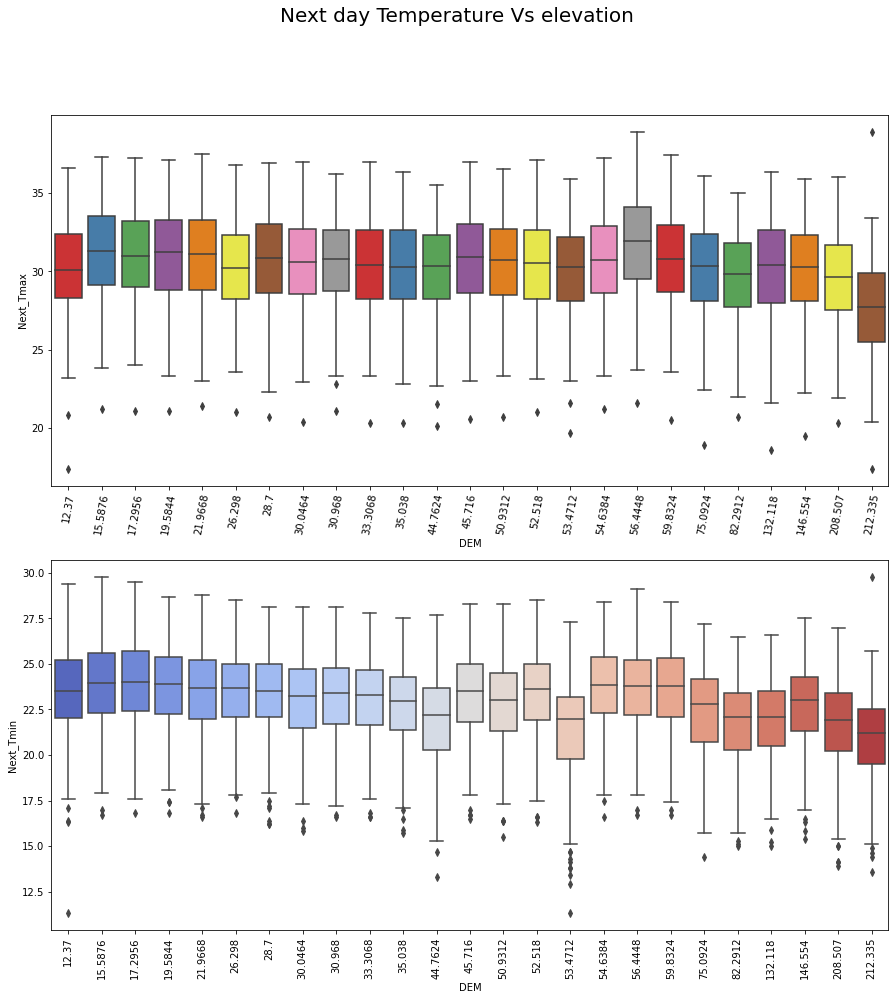

In [41]:
# Comparing Next day temperature and elevation

plt.figure(figsize=(15,15))
plt.suptitle('Next day Temperature Vs elevation',fontsize=20)

plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data=df,palette="Set1")
plt.xticks(rotation=80)

plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=df,palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

The highest temperature is observed at the elevation56.4448 for Next_Tmax and15.58769 in Next_Tmin

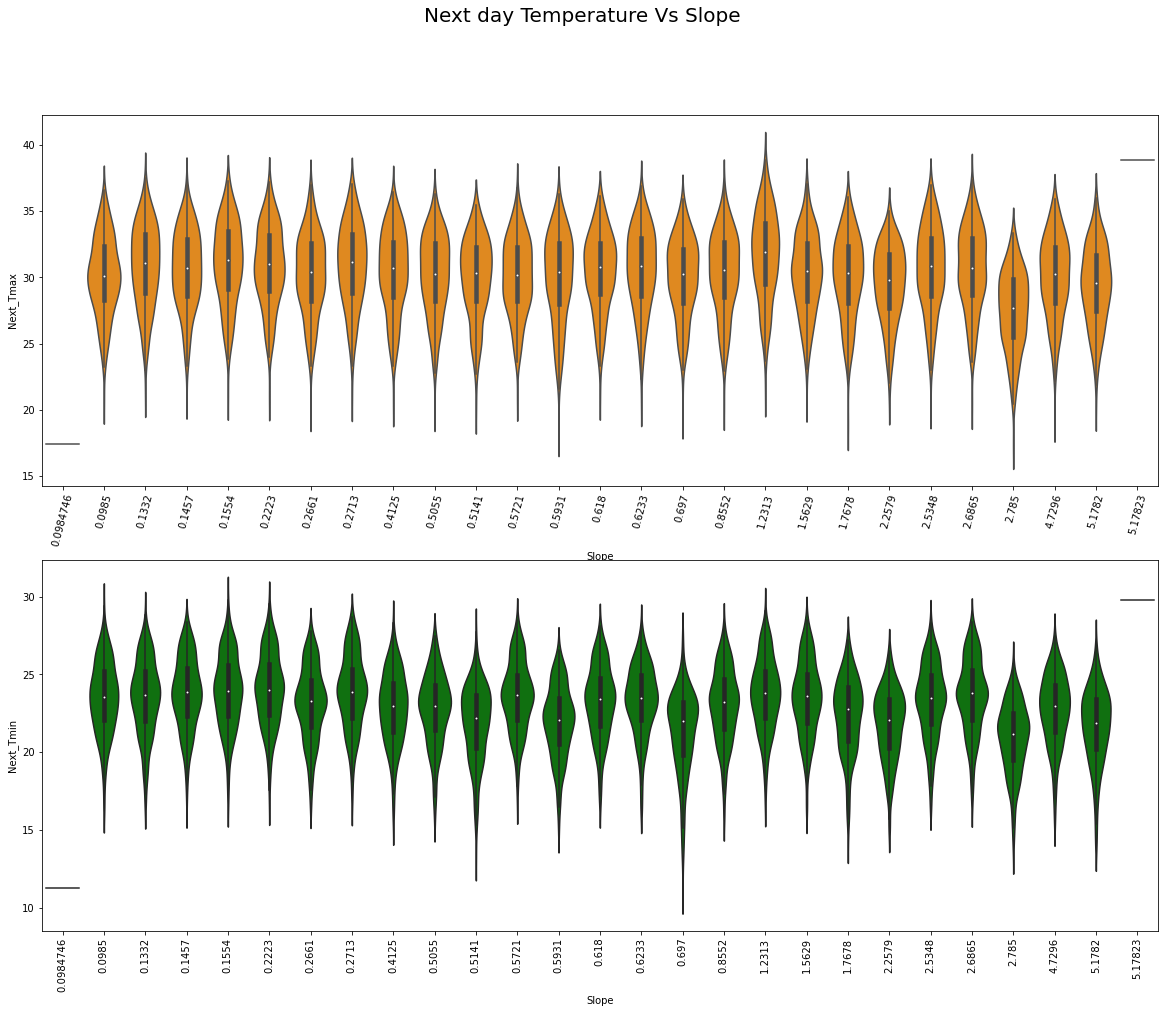

In [42]:
# Comparing Next day temperature and slope

plt.figure(figsize=(20,15))
plt.suptitle('Next day Temperature Vs Slope',fontsize=20)

plt.subplot(2,1,1)
sns.violinplot(x='Slope',y='Next_Tmax',data=df,color="darkorange")
plt.xticks(rotation=75)

plt.subplot(2,1,2)
sns.violinplot(x='Slope',y='Next_Tmin',data=df,color="g")
plt.xticks(rotation=90)
plt.show()

Lowest and highest temperatures observed at consecutive slopes 2.785 and 1.2313 respectively in both the cases.

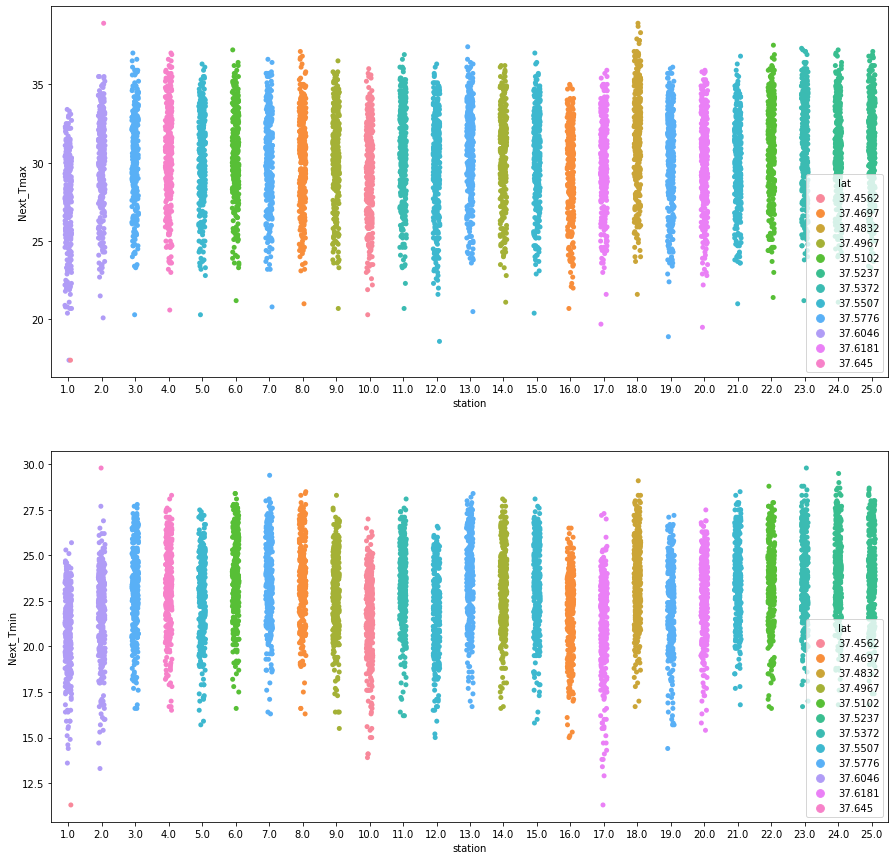

In [43]:
# Visualizing the relation between station and the target variables on the basis of latitude
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(df['station'],df["Next_Tmax"],data=df,hue=df["lat"])
plt.subplot(2,1,2)
sns.stripplot(df['station'],df["Next_Tmin"],data=df,hue=df["lat"])
plt.show()

As the latitude decreases in each station, the temperture seems to be increases.



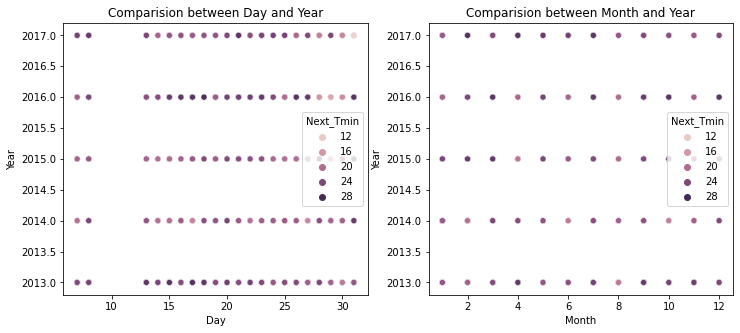

In [44]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between Day and Year')
sns.scatterplot(df['Day'],df['Year'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Month and Year')
sns.scatterplot(df['Month'],df['Year'],hue=df['Next_Tmin']);
plt.show()

In first graph i can notice that 6 to 13 day there is no temperature noted.

In second graph it looks setteled

# Identifying the Outliers

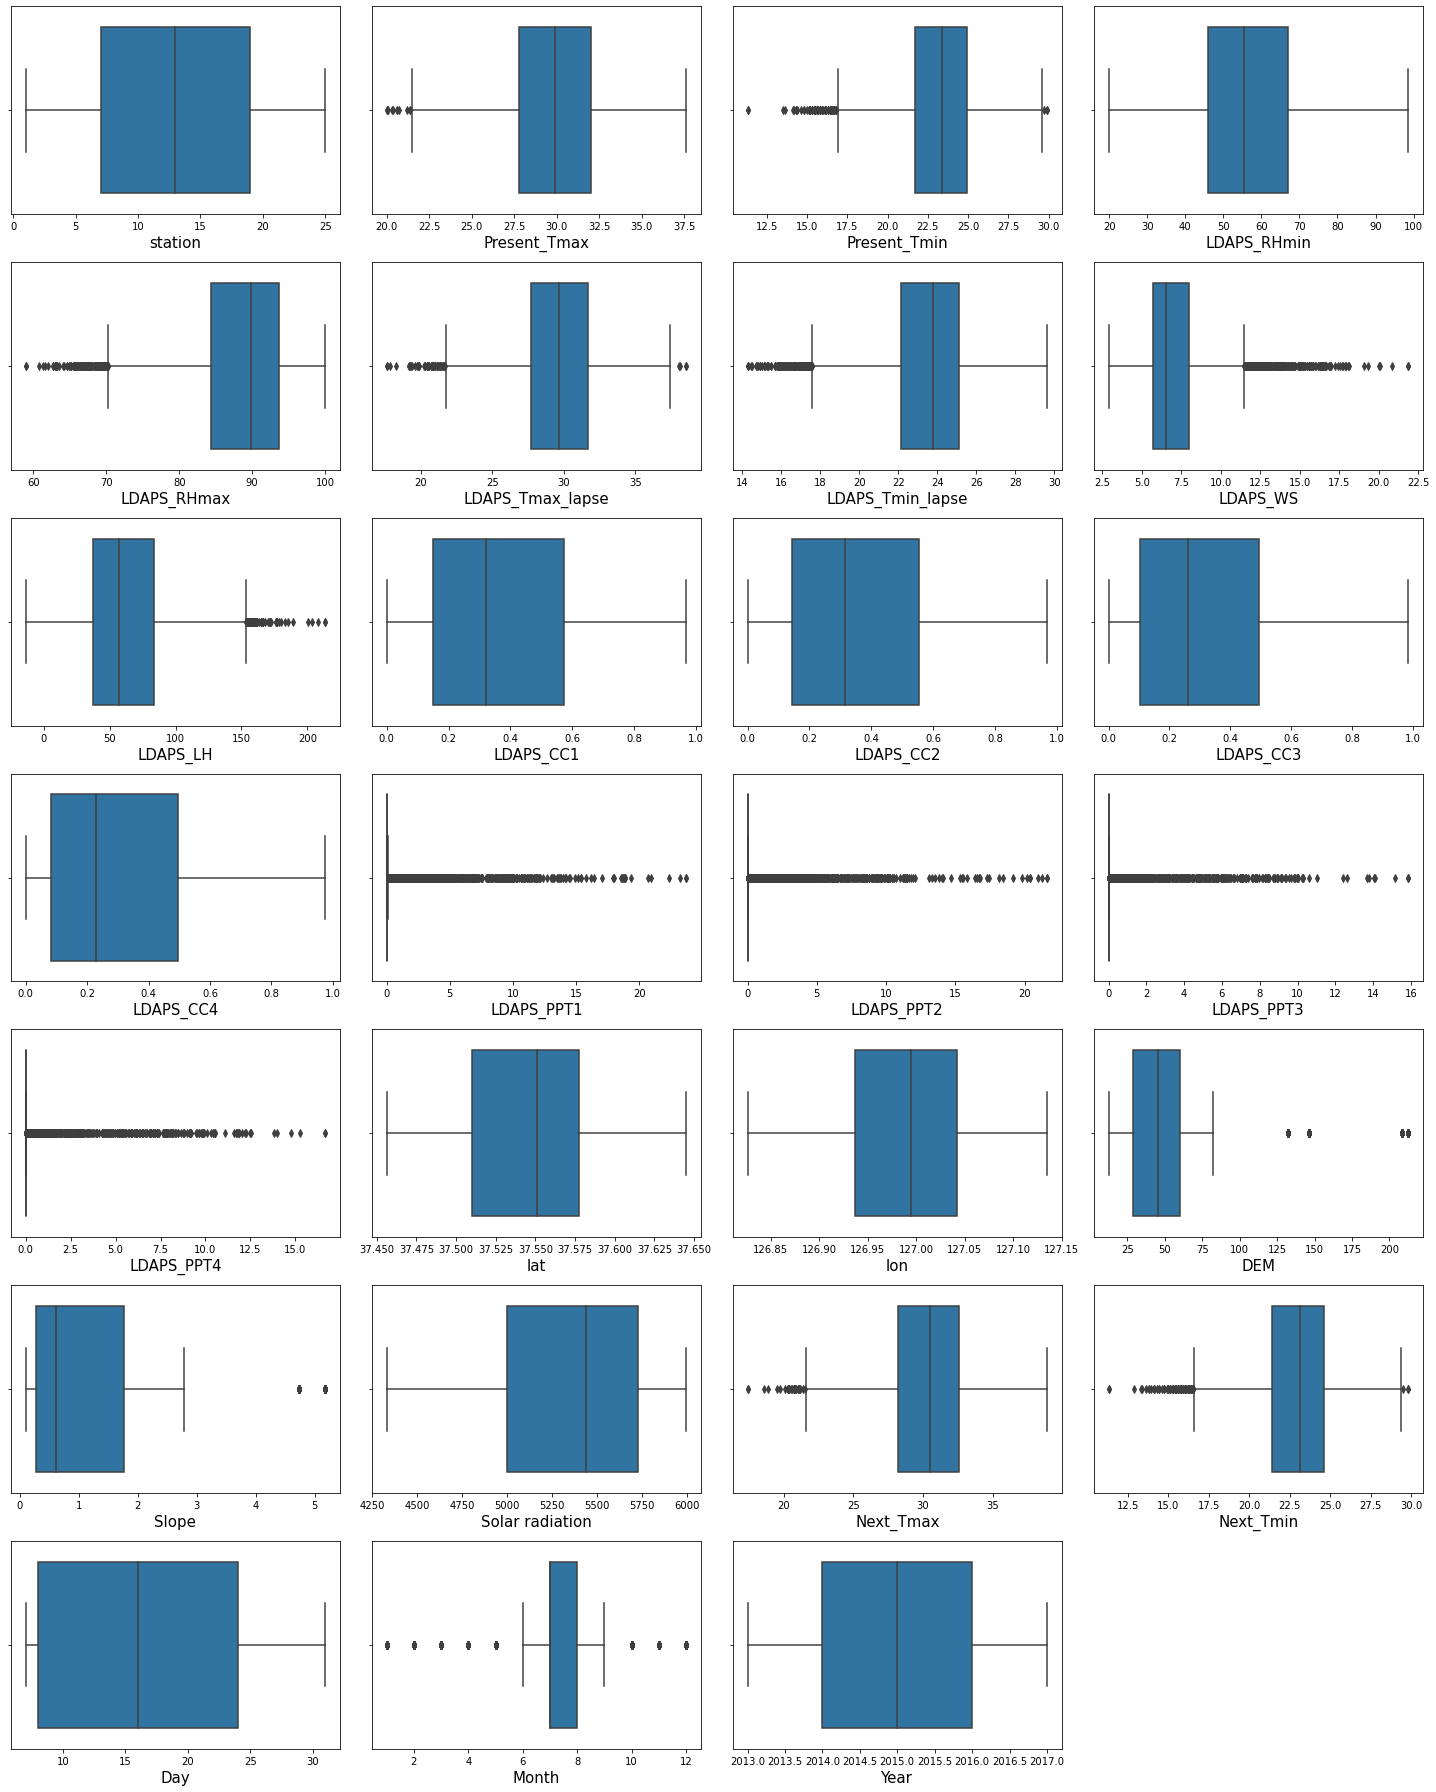

In [45]:
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=27:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

The outliers present in the following columns:

Present_Tmax
Present_Tmin
LDAPS_RHmax
LDAPS_Tmax_lapse
LDAPS_Tmin_lapse
LDAPS_WS
LDAPS_LH
LDAPS_PPT1
LDAPS_PPT2
LDAPS_PPT3
LDAPS_PPT4
DEM
Slope
Next_Tmax
Next_Tmin
Month

# Removing outliers
1. Zscore method

In [46]:
# Features containing outliers
features = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Month
843,0.462802,0.405739,0.148276,0.202495,1.342603,0.538679,0.789827,0.026388,0.273714,0.238242,0.222227,0.243650,0.372715,2.270299
912,0.010753,1.487773,0.548785,0.308132,1.097396,0.314654,0.424931,0.302656,0.191849,0.422667,0.222227,0.037504,1.043125,0.929804
1876,0.226025,0.676296,0.081877,0.032105,0.134665,0.100469,0.157536,0.302656,0.273714,0.238242,0.222227,0.315157,0.542158,0.036141
432,1.139308,0.072805,0.747853,0.835797,0.395553,0.555656,1.086240,0.284299,0.217528,0.238242,0.222227,0.172266,0.223191,0.036141
7434,0.361326,0.634679,0.210748,0.122309,0.629098,0.187026,0.059652,0.302656,0.273714,0.523493,0.222227,2.701715,2.861413,0.410691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,0.687259,1.446156,0.031756,0.363582,1.474717,0.239930,0.798694,0.302656,0.273714,0.238242,0.222227,0.243650,0.372715,0.036141
4770,1.917290,0.842763,0.928103,0.959646,1.322591,1.062869,0.544928,0.782431,0.335774,0.601958,1.012402,0.655350,0.499833,1.376636
5332,0.293675,1.404540,0.935747,0.161105,0.145718,0.011579,0.259291,0.184060,0.202067,0.238242,0.222227,0.172266,0.223191,0.036141
4934,0.924036,0.551446,0.585669,1.245882,0.614070,0.944654,0.114440,0.009471,0.273714,0.021923,0.405109,2.701715,2.861413,1.751186


Now we have removed the outliers.



In [47]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
843,19.0,28.4,24.2,69.021774,89.449890,29.019588,26.648549,8.263515,35.936475,0.471469,0.322900,0.384341,0.258570,0.535152,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5407.366699,32.5,25.9,8,2,2013
912,13.0,29.8,26.8,76.749825,92.316734,30.517108,26.076250,6.408564,48.185790,0.248862,0.437526,0.508867,0.135038,0.000000,0.143656,0.764289,0.000000,37.5776,127.083,59.8324,2.6865,5283.324219,28.3,22.9,8,5,2013
1876,2.0,29.1,21.6,46.896816,88.974609,29.707601,23.200683,7.310947,57.162059,0.238007,0.130544,0.000054,0.000000,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5753.916504,30.6,20.4,13,7,2014
432,8.0,26.4,23.4,73.263000,93.741669,27.162298,24.438185,5.884680,25.986054,0.569781,0.618961,0.613701,0.299167,0.035559,0.098596,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5689.650879,28.5,23.9,17,7,2013
7434,10.0,28.7,21.7,53.745548,89.897064,29.254749,22.046702,6.685997,60.447960,0.220522,0.272913,0.462178,0.480357,0.000000,0.000000,0.880885,0.000000,37.4562,126.955,208.5070,5.1782,4843.271973,27.8,20.8,18,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,19.0,31.8,26.7,67.389046,88.161217,30.679725,26.956897,6.570997,35.638811,0.468705,0.511895,0.566654,0.357152,0.000000,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5659.175293,32.8,26.3,21,7,2017
4770,21.0,24.1,21.2,86.573532,95.031898,26.799083,20.428126,9.402985,44.157577,0.915553,0.944783,0.828596,0.699816,2.101894,1.069522,0.971625,1.482267,37.5507,127.040,26.2980,0.5721,5826.782227,25.8,20.6,7,4,2016
5332,8.0,28.9,26.6,62.166817,95.086617,29.140972,23.855082,7.117721,53.746234,0.587029,0.581732,0.100016,0.036852,0.942805,0.834895,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5483.880859,30.5,25.8,27,7,2016
4934,10.0,32.5,21.9,71.017380,92.580757,25.959637,22.081776,5.039087,66.292151,0.760669,0.379364,0.658193,0.463976,0.604613,0.000000,0.300860,0.753165,37.4562,126.955,208.5070,5.1782,5778.769531,29.7,21.3,7,11,2016


In [48]:
# Shape of original dataset
df.shape

(7752, 27)

Before removing the outliers we had 7752 rows and 27 columns in our dataset.



In [49]:

# Shape of new dataframe
new_df.shape

(6907, 27)

After removing the outliers we have 6907 rows and 27 columns.



In [50]:
# Checking the the data loss
data_loss = (7752-6907)/7752*100
data_loss

10.900412796697626

Here we are losing more than 10% of data. Let's check the data loss using IQR method and then we will decide whether to remove outliers or not.



2. IQR (Inter Quantile Range) method

In [51]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
df1.shape


(2413, 27)

Using IQR method the dataframe has 2413 rows and 27 columns.



In [53]:
# Let's check the dataloss
data_loss = (7752-2413)/7752*100
data_loss

68.87254901960785

Using IQR method we are losing 68.87% of data.

By using both Zscore and IQR method we are losing more data, so I am not going to remove outliers since the outliers present in the data may have some strong relation with columns. If we try to remove the outliers, it will impact the other variables since it eliminates one complete row. That row may have other good test for other values. On this basis I am not going to remove the outliers in any of the columns and keeping my dataframe as it is.

# Correlation between the target variable and features using HEAT map

In [54]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.112806,0.132122,-0.066731,-0.166334,0.069363,0.105053,0.004353,-0.133693,0.006769,0.003223,0.000442,0.005849,-0.004990,-0.010555,-0.015051,-0.013033,-0.237438,-0.118574,-0.256095,-0.090413,-0.018787,0.108289,0.128713,-0.000730,-0.000169,-0.000582
Present_Tmax,0.112806,1.000000,0.618760,-0.204571,-0.300322,0.570129,0.624216,-0.123582,0.134251,-0.311805,-0.213791,-0.145577,-0.142683,-0.111129,-0.101377,-0.122044,-0.101178,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741,-0.143899,-0.001185,0.059665
Present_Tmin,0.132122,0.618760,1.000000,0.123143,-0.012754,0.464151,0.764227,-0.037708,-0.011276,0.084447,0.090263,-0.005466,-0.047714,0.109121,0.064829,-0.049005,-0.065647,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670,-0.108728,-0.003550,0.036987
LDAPS_RHmin,-0.066731,-0.204571,0.123143,1.000000,0.579032,-0.564580,0.089471,0.294271,-0.070848,0.613818,0.745443,0.689513,0.513878,0.262547,0.390824,0.240576,0.168555,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019,-0.065735,-0.053922,-0.001984
LDAPS_RHmax,-0.166334,-0.300322,-0.012754,0.579032,1.000000,-0.373334,-0.113914,0.134786,0.238183,0.436570,0.391256,0.226434,0.130008,0.267698,0.228398,0.134087,0.117376,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281341,-0.070246,-0.012803,-0.039040,-0.142223
LDAPS_Tmax_lapse,0.069363,0.570129,0.464151,-0.564580,-0.373334,1.000000,0.653985,-0.311900,0.048004,-0.438439,-0.523619,-0.541197,-0.429374,-0.111016,-0.242033,-0.188063,-0.160235,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868,-0.160495,-0.021745,0.015978
LDAPS_Tmin_lapse,0.105053,0.624216,0.764227,0.089471,-0.113914,0.653985,1.000000,-0.130245,-0.134906,0.010900,0.047725,-0.044233,-0.080587,0.037727,0.000588,-0.088791,-0.094855,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588206,0.881059,-0.177770,-0.026990,-0.004937
LDAPS_WS,0.004353,-0.123582,-0.037708,0.294271,0.134786,-0.311900,-0.130245,1.000000,0.007115,0.289356,0.261010,0.243402,0.221066,0.153213,0.192427,0.162173,0.144550,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345619,-0.098767,-0.028982,-0.082375,-0.110409
LDAPS_LH,-0.133693,0.134251,-0.011276,-0.070848,0.238183,0.048004,-0.134906,0.007115,1.000000,-0.147276,-0.264245,-0.245130,-0.172222,-0.012042,-0.077061,0.016483,0.020332,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155608,-0.056906,-0.012227,-0.023536,0.057462
LDAPS_CC1,0.006769,-0.311805,0.084447,0.613818,0.436570,-0.438439,0.010900,0.289356,-0.147276,1.000000,0.779683,0.517368,0.360908,0.446128,0.389310,0.168695,0.091700,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028,-0.019928,-0.076224,-0.066300


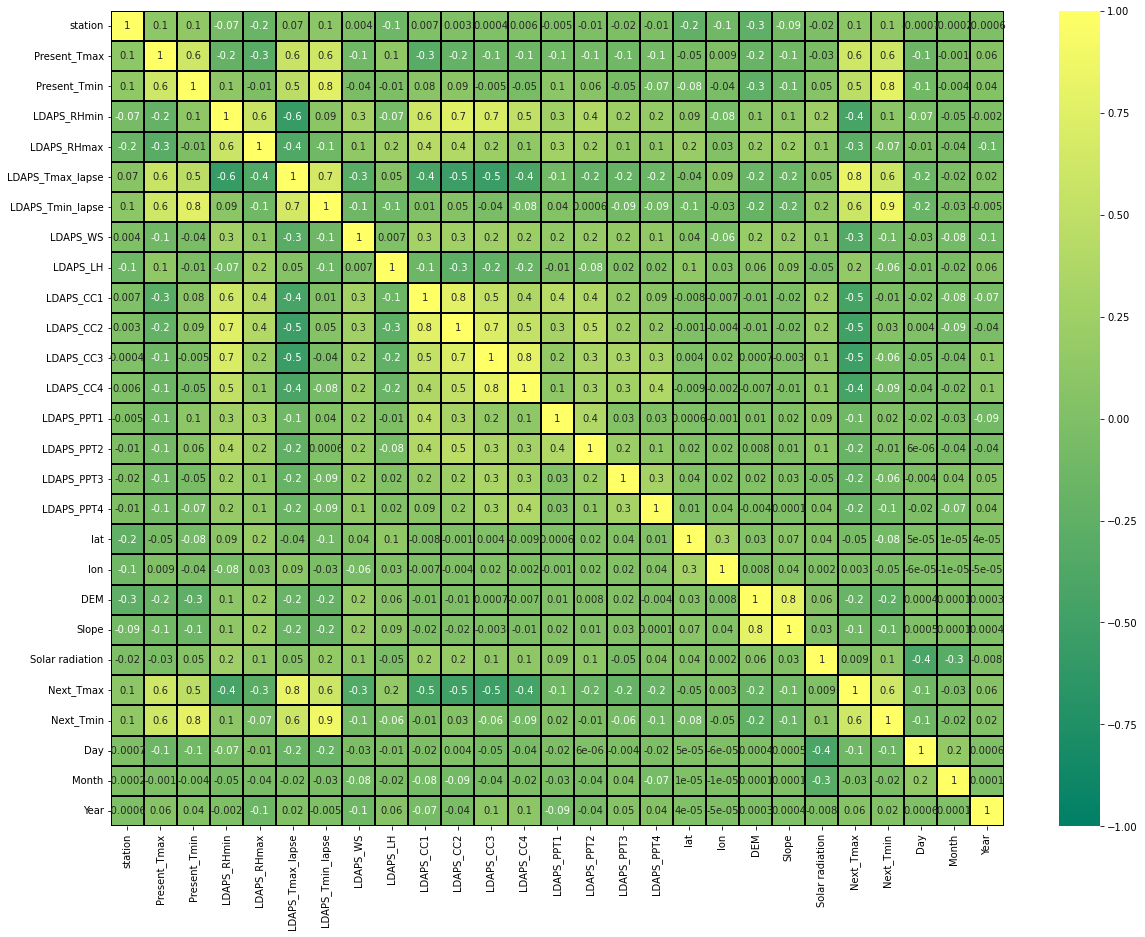

In [55]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="summer")
plt.yticks(rotation=0);

Correlation between Next_Tmax and features

The label Next_Tmax is highly positively correlated with LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Present_Tmax, Present_Tmin and Next_Tmin.
The label is negatively correlated with LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_RHmax, LDAPS_RHmin, and LDAPS_WS.
The features lon and Solar radiations have very less correlation with the target Next_Tmin.

Correlation between Next_Tmin and features

The label Next_Tmin is highly positively correlated with LDAPS_Tmin_lapse, Present_Tmin, LDAPS_Tmax_lapse, Present_Tmax and Next_Tmax.
The label is negatively correlated with DEM, Slope and Day.
From the heat map we can observe that most of the features are highly correlated with each other which leads to a multicollinearity problem. We will check VIF values and then drop the columns containing VIF less than 5 to get rid of multicollinearity issue.

# 1. Prediction for Next_Tmax

Visualizing the correlation between label Next_Tmax and features using bar plot

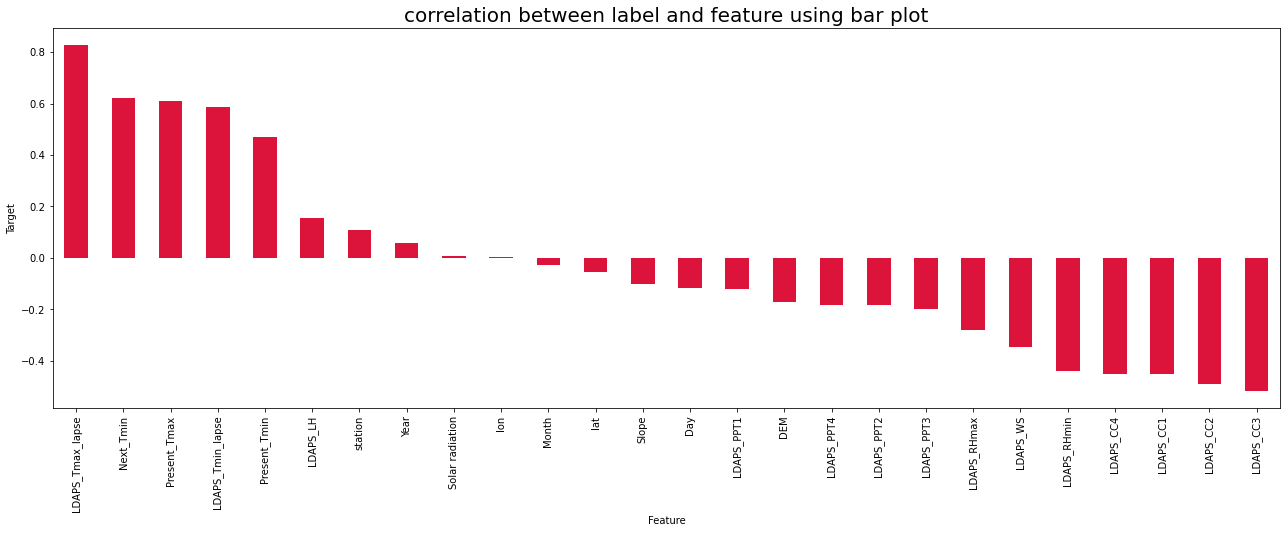

In [56]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='crimson')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

The columns Solar radiations and longitude have very less correlation with the label. We can drop this column if necessary.



Separating the features and label variables into x and y

In [57]:
x = df.drop("Next_Tmax", axis=1)
y = df["Next_Tmax"]

In [58]:
# Dimension of x
x.shape

(7752, 26)

In [59]:
# Dimension of y
y.shape

(7752,)

Checking for skewness

In [60]:
# Checking the skewness
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmin          -0.404447
Day                 0.245283
Month              -0.705586
Year               -0.000365
dtype: float64

Removing skewness using yeo-johnson method

In [61]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [62]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,LDAPS_RHmax,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Month
843,-0.006814,1.475617,0.772526,-0.752220,0.471050,0.073765,1.669811,-0.519114,-0.492283,-0.444377,0.724774,0.902752,0.011083,-2.025238
912,0.482475,1.161952,-0.139920,-0.330167,0.890854,-0.556338,-0.557338,0.830222,2.504029,-0.444377,0.441360,1.284394,-0.293226,-1.003551
1876,-0.081857,-0.230704,0.352931,-0.047530,-1.596749,-1.481793,-0.557338,-0.519114,-0.492283,-0.444377,0.055979,-0.385336,1.012664,-0.126054
432,0.750395,0.332093,-0.482903,-1.138995,1.187990,0.247797,-0.210353,0.510484,-0.492283,-0.444377,0.271491,0.779596,0.808913,-0.126054
7434,0.065323,-0.708176,0.023456,0.051460,0.742922,0.879144,-0.557338,-0.519114,2.524998,-0.444377,1.817960,1.742160,-1.175891,0.363879


In [63]:
# Checking skewness after using yeo-johnson method
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.116481
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmin          -0.404447
Day                 0.245283
Month               0.043780
Year               -0.000365
dtype: float64

I have used all the methods like cube root, square root, log and log1p transformations and yeo-johnson methods but the skewness is not reducing in LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 . This is because these columns may have some extreme test level. So keeping the skewness in those columns as it is and moving further.

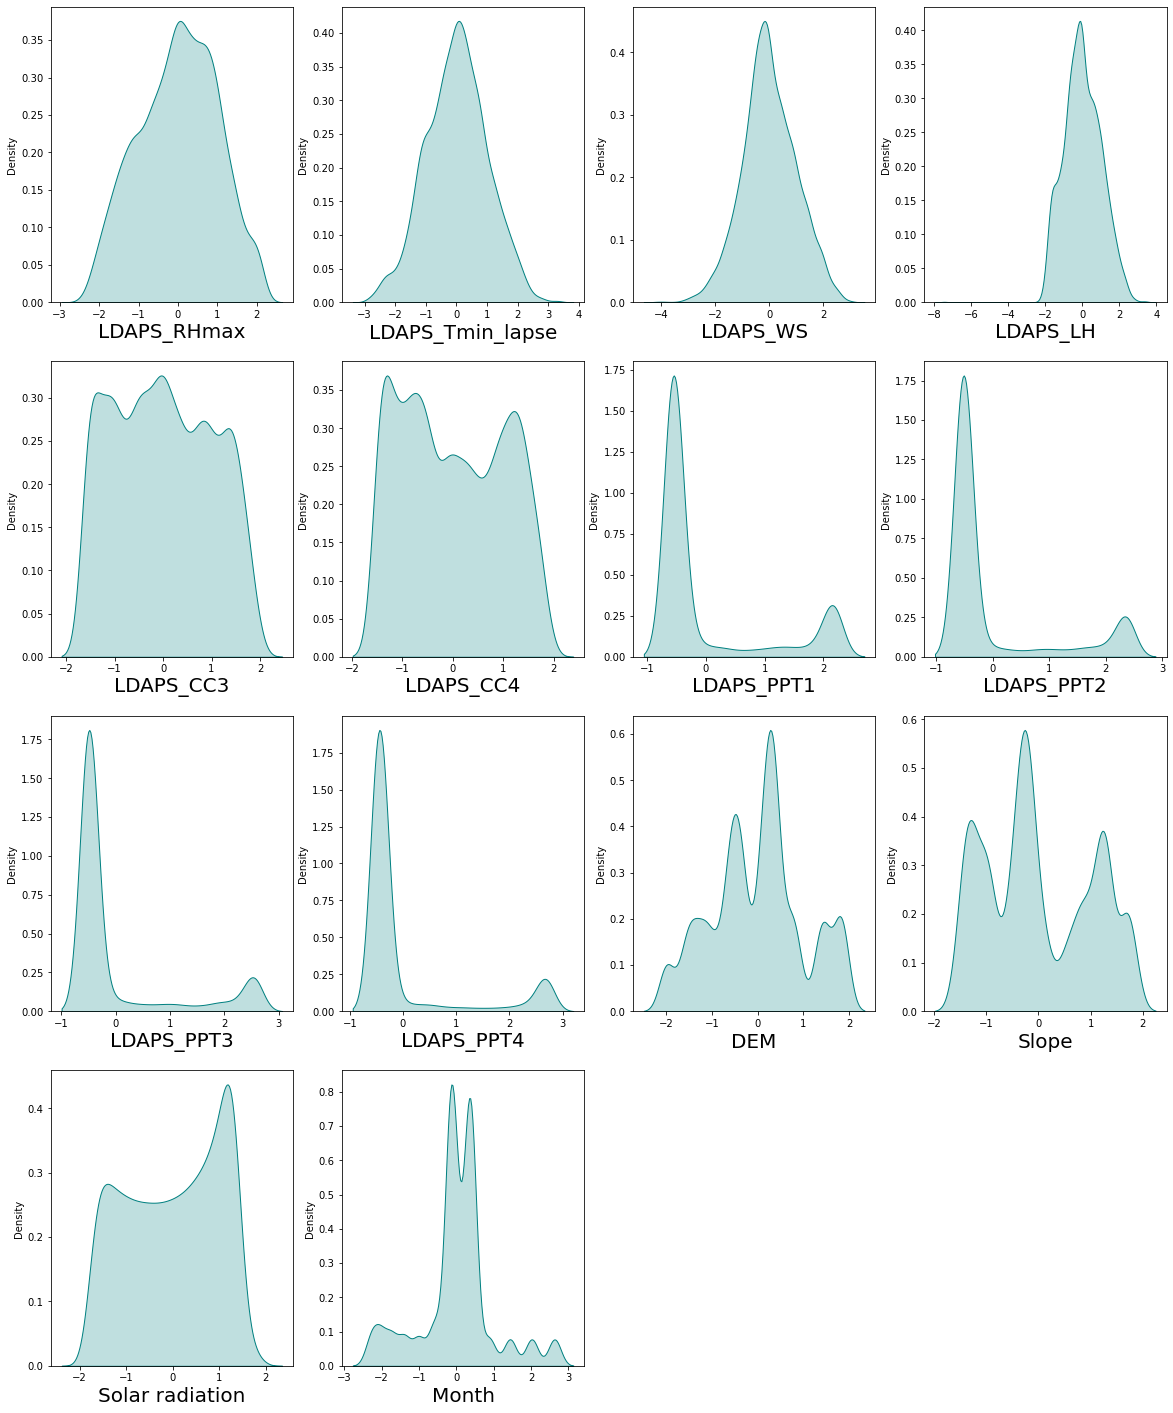

In [64]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x[column],color='teal',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Since the precipitation columns have skewness and are not in normal, so we will use MinMaxScaler to scale the data

Feature Scaling using MinMaxScaler

In [65]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year
0,0.750000,0.477273,0.693548,0.625264,0.531850,0.544747,0.703686,0.685618,0.614432,0.487418,0.333453,0.581672,0.461363,0.808069,0.000000,0.000000,0.000000,0.643008,0.362460,0.709380,0.739267,0.508003,0.789189,0.041667,0.050037,0.00
1,0.500000,0.556818,0.833333,0.723423,0.638234,0.616339,0.653101,0.558174,0.653144,0.257280,0.451825,0.699739,0.274481,0.000000,0.465317,0.980932,0.000000,0.643008,0.831715,0.635190,0.857810,0.426561,0.627027,0.041667,0.258616,0.00
2,0.041667,0.517045,0.553763,0.344241,0.515534,0.577639,0.428504,0.627012,0.679069,0.246059,0.134810,0.000118,0.000000,0.000000,0.000000,0.000000,0.000000,0.786017,0.666667,0.534308,0.339168,0.776056,0.491892,0.250000,0.437757,0.25
3,0.291667,0.363636,0.650538,0.679135,0.696486,0.455955,0.519268,0.510268,0.578955,0.589056,0.639190,0.783307,0.512979,0.125896,0.355055,0.000000,0.000000,0.071504,0.271845,0.590723,0.701013,0.721526,0.681081,0.416667,0.437757,0.00
4,0.375000,0.494318,0.559140,0.431231,0.547535,0.555989,0.351501,0.580993,0.688149,0.227983,0.281832,0.658135,0.700231,0.000000,0.000000,0.987797,0.000000,0.000000,0.417476,0.995545,0.999999,0.190333,0.513514,0.458333,0.537778,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,0.750000,0.670455,0.827957,0.604526,0.488441,0.624114,0.731787,0.571730,0.613431,0.484561,0.528624,0.747368,0.579910,0.000000,0.000000,0.000000,0.000000,0.643008,0.362460,0.709380,0.739267,0.696467,0.810811,0.583333,0.437757,1.00
7748,0.833333,0.232955,0.532258,0.848200,0.752512,0.438591,0.255284,0.742100,0.640895,0.946526,0.975660,0.921183,0.860904,0.987216,0.966372,0.991215,0.999170,0.500530,0.692557,0.330774,0.372033,0.840725,0.502703,0.000000,0.180410,0.75
7749,0.291667,0.505682,0.822581,0.538195,0.754959,0.550550,0.475421,0.613512,0.669408,0.606888,0.600744,0.195845,0.084050,0.922506,0.941054,0.000000,0.000000,0.071504,0.271845,0.590723,0.701013,0.561879,0.783784,0.833333,0.437757,0.75
7750,0.375000,0.710227,0.569892,0.650612,0.648748,0.398459,0.353736,0.416143,0.703828,0.786402,0.391762,0.815181,0.685721,0.838142,0.000000,0.840303,0.987485,0.000000,0.417476,0.995545,0.999999,0.797769,0.540541,0.000000,0.875633,0.75


Checking VIF(Variance Inflation Factor) values

In [66]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


,VIF values,Features
0,4.535428,station
1,34.326786,Present_Tmax
2,87.573461,Present_Tmin
3,46.304936,LDAPS_RHmin
4,18.931767,LDAPS_RHmax
5,91.235502,LDAPS_Tmax_lapse
6,65.391863,LDAPS_Tmin_lapse
7,20.706293,LDAPS_WS
8,64.171809,LDAPS_LH
9,15.196002,LDAPS_CC1


The column Next_Tmin has VIF value greater than 10, we will remove this to overcome with the issue of multicollinearity. After dropping the column will check VIF again, if we find the value above 10 then we will remove that column having high VIF. This process will continue until we get the VIF value less than 10.

In [67]:
# Dropping Next_Tmin column
x.drop("Next_Tmin",axis=1,inplace=True)

In [68]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.534769,station
1,33.775211,Present_Tmax
2,77.650831,Present_Tmin
3,44.961529,LDAPS_RHmin
4,18.750713,LDAPS_RHmax
5,85.634325,LDAPS_Tmax_lapse
6,53.842800,LDAPS_Tmin_lapse
7,20.441734,LDAPS_WS
8,64.094992,LDAPS_LH
9,15.191476,LDAPS_CC1


The column LDAPS_Tmax_lapse has High VIF value compare to other columns. Let's drop it.



In [69]:
# Dropping LDAPS_Tmax_lapse column
x.drop("LDAPS_Tmax_lapse",axis=1,inplace=True)

In [70]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.448455,station
1,33.514842,Present_Tmax
2,74.270762,Present_Tmin
3,32.144165,LDAPS_RHmin
4,18.587646,LDAPS_RHmax
5,29.540906,LDAPS_Tmin_lapse
6,20.406185,LDAPS_WS
7,50.196246,LDAPS_LH
8,15.077095,LDAPS_CC1
9,17.526319,LDAPS_CC2


After removing two columns also we are getting VIF value high in Present_Tmin. We will drop this column.



In [71]:
# Dropping Present_Tmin column
x.drop("Present_Tmin",axis=1,inplace=True)

In [72]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.422332,station
1,29.139375,Present_Tmax
2,32.124332,LDAPS_RHmin
3,18.146943,LDAPS_RHmax
4,20.074250,LDAPS_Tmin_lapse
5,19.820954,LDAPS_WS
6,48.036006,LDAPS_LH
7,14.853205,LDAPS_CC1
8,17.525836,LDAPS_CC2
9,17.701459,LDAPS_CC3


The VIF is high in LDAPS_LH,Let's remove that column.



In [73]:
# Dropping LDAPS_LH column
x.drop("LDAPS_LH",axis=1,inplace=True)

In [74]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.357750,station
1,22.420439,Present_Tmax
2,31.898138,LDAPS_RHmin
3,15.012201,LDAPS_RHmax
4,19.565808,LDAPS_Tmin_lapse
5,17.942441,LDAPS_WS
6,14.506970,LDAPS_CC1
7,16.963098,LDAPS_CC2
8,17.584827,LDAPS_CC3
9,9.659758,LDAPS_CC4


LDAPS_RHmin has high VIF, let's drop it.



In [75]:
# Dropping LDAPS_RHmin column
x.drop("LDAPS_RHmin",axis=1,inplace=True)

In [76]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.353489,station
1,21.959436,Present_Tmax
2,10.499715,LDAPS_RHmax
3,17.943622,LDAPS_Tmin_lapse
4,17.494162,LDAPS_WS
5,14.424489,LDAPS_CC1
6,15.972219,LDAPS_CC2
7,15.747872,LDAPS_CC3
8,9.644795,LDAPS_CC4
9,3.300489,LDAPS_PPT1


We can find the VIF value high in Present_Tmax compared to others. Let's remove that column.



In [77]:
# Dropping Present_Tmax column
x.drop("Present_Tmax",axis=1,inplace=True)

In [78]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.249027,station
1,10.494177,LDAPS_RHmax
2,8.455903,LDAPS_Tmin_lapse
3,16.864879,LDAPS_WS
4,13.559921,LDAPS_CC1
5,15.963881,LDAPS_CC2
6,15.656609,LDAPS_CC3
7,9.638630,LDAPS_CC4
8,3.270818,LDAPS_PPT1
9,2.956593,LDAPS_PPT2


In [79]:
# Removing the column LDAPS_WS which has VIF greater than 10.
x.drop("LDAPS_WS",axis=1,inplace=True)

In [80]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.968764,station
1,10.436610,LDAPS_RHmax
2,7.862778,LDAPS_Tmin_lapse
3,13.491842,LDAPS_CC1
4,15.963879,LDAPS_CC2
5,15.636448,LDAPS_CC3
6,9.616443,LDAPS_CC4
7,3.269027,LDAPS_PPT1
8,2.955624,LDAPS_PPT2
9,2.200587,LDAPS_PPT3


In [81]:
# Removing LDAPS_CC2 column which has VIF above 10.
x.drop("LDAPS_CC2",axis=1,inplace=True)

In [82]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.968088,station
1,10.275045,LDAPS_RHmax
2,7.779405,LDAPS_Tmin_lapse
3,9.312590,LDAPS_CC1
4,12.846864,LDAPS_CC3
5,9.616340,LDAPS_CC4
6,3.072742,LDAPS_PPT1
7,2.322113,LDAPS_PPT2
8,2.199760,LDAPS_PPT3
9,2.027317,LDAPS_PPT4


In [83]:
# Dropping DEM column
x.drop("DEM",axis=1,inplace=True)

In [84]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.680109,station
1,10.128386,LDAPS_RHmax
2,7.716922,LDAPS_Tmin_lapse
3,9.311825,LDAPS_CC1
4,12.843669,LDAPS_CC3
5,9.614301,LDAPS_CC4
6,3.068458,LDAPS_PPT1
7,2.318813,LDAPS_PPT2
8,2.199743,LDAPS_PPT3
9,2.027274,LDAPS_PPT4


In [85]:
# Dropping LDAPS_CC3 column which has high VIF value
x.drop("LDAPS_CC3",axis=1,inplace=True)

In [86]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.680031,station
1,10.128315,LDAPS_RHmax
2,7.687641,LDAPS_Tmin_lapse
3,8.363750,LDAPS_CC1
4,5.068478,LDAPS_CC4
5,2.973010,LDAPS_PPT1
6,2.303686,LDAPS_PPT2
7,1.977942,LDAPS_PPT3
8,2.015596,LDAPS_PPT4
9,4.878332,lat


In [87]:
# Removing the column LDAPS_RHmax which has VIF above 10
x.drop("LDAPS_RHmax",axis=1,inplace=True)

In [88]:
# Checking varience inflation factor again

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.680020,station
1,7.637569,LDAPS_Tmin_lapse
2,7.980586,LDAPS_CC1
3,5.057435,LDAPS_CC4
4,2.931576,LDAPS_PPT1
5,2.282662,LDAPS_PPT2
6,1.967399,LDAPS_PPT3
7,2.010568,LDAPS_PPT4
8,4.437019,lat
9,5.551137,lon


In [89]:
# Checking dataframe after removing the columns
x.head()

,station,LDAPS_Tmin_lapse,LDAPS_CC1,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,Slope,Solar radiation,Day,Month,Year
0,0.750000,0.703686,0.487418,0.461363,0.808069,0.000000,0.000000,0.0,0.643008,0.362460,0.739267,0.508003,0.041667,0.050037,0.00
1,0.500000,0.653101,0.257280,0.274481,0.000000,0.465317,0.980932,0.0,0.643008,0.831715,0.857810,0.426561,0.041667,0.258616,0.00
2,0.041667,0.428504,0.246059,0.000000,0.000000,0.000000,0.000000,0.0,0.786017,0.666667,0.339168,0.776056,0.250000,0.437757,0.25
3,0.291667,0.519268,0.589056,0.512979,0.125896,0.355055,0.000000,0.0,0.071504,0.271845,0.701013,0.721526,0.416667,0.437757,0.00
4,0.375000,0.351501,0.227983,0.700231,0.000000,0.000000,0.987797,0.0,0.000000,0.417476,0.999999,0.190333,0.458333,0.537778,1.00


In [90]:
x.shape

(7752, 15)

After removing the colums containing VIF above 10, the dataframe contains 15 columns. We have done all the preprocessing and data cleaning, now our dataset is ready for building the machine learning models.



Finding the accuracy and best random state

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [127]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.913402767663229  on Random_state  54


Creating new train test split

Regression Algorithms

In [96]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

R2_Score: 0.8906179352678211
MAE: 0.7380661457507232
MSE: 1.0351653075606426
RMSE: 1.0174307384587133


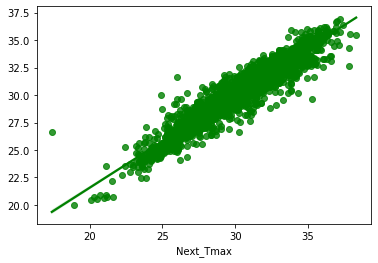

In [101]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# Visualizing the predicted values
sns.regplot(y_test,predRFR,color="g")
plt.show()

Decision Tree Regressor

R2_Score: 0.728585838595452
MAE: 1.10115018908247
MSE: 2.568597736334356
RMSE: 1.6026845404927186


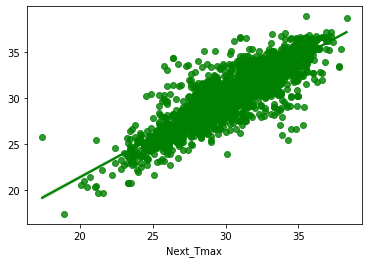

In [102]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicteed values
sns.regplot(y_test,predDTR,color="g")
plt.show()

GradientBoosting Regressor

R2_Score: 0.787577929307377
MAE: 1.0981239423631102
MSE: 2.0103109104733132
RMSE: 1.4178543333055456


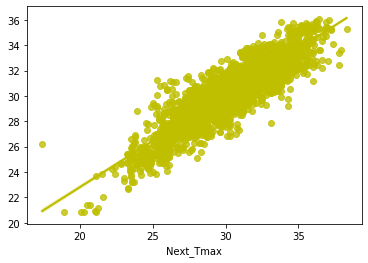

In [103]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Visualizing the predicted values
sns.regplot(y_test,predGB,color="y")
plt.show()

KNeighbors Regressor

R2_Score: 0.7488128494266119
MAE: 1.1619238160432093
MSE: 2.3771742160402627
RMSE: 1.5418087482046088


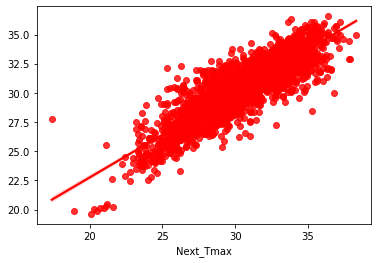

In [104]:
# Checking R2 score for KNeighbors Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Visualizing the predicted values
sns.regplot(y_test,predknn,color="r")
plt.show()

Bagging Regressor

R2_Score: 0.8744247335500337
MAE: 0.7969120759557778
MSE: 1.1884138376339057
RMSE: 1.0901439527117076


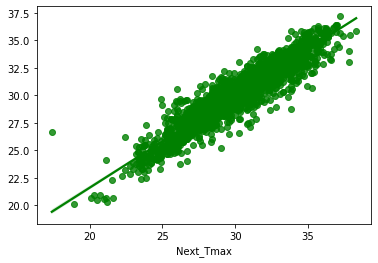

In [105]:
# Checking R2 score for BaggingRegressor

BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

# Visualizing the predicted values
sns.regplot(y_test,predBR,color="g")
plt.show()

XGB Regressor

R2_Score: 0.9112092724319265
MAE: 0.6868727074751851
MSE: 0.8402938912936629
RMSE: 0.9166754558150136


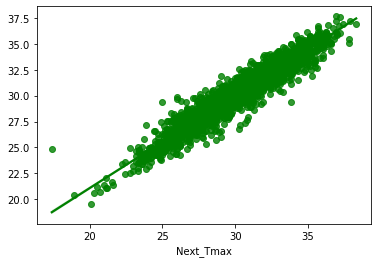

In [106]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

XGB=xgb()
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
print('R2_Score:',r2_score(y_test,predXGB))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXGB))
print('MSE:',metrics.mean_squared_error(y_test, predXGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXGB)))

# Visualizing the predicted values
sns.regplot(y_test,predXGB,color="g")
plt.show()

Extra Trees Regressor

R2_Score: 0.9074499768008363
MAE: 0.669809198952603
MSE: 0.8758709525577486
RMSE: 0.935879774627996


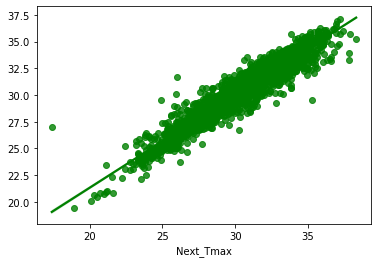

In [107]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
print('R2_Score:',r2_score(y_test,predXT))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Visualizing the predicted values
sns.regplot(y_test,predXT,color="g")
plt.show()

Stochastic Gradient Descent Regressor

R2_Score: 0.604704090228064
MAE: 1.4958286661013547
MSE: 3.7409845299450555
RMSE: 1.9341624879893249


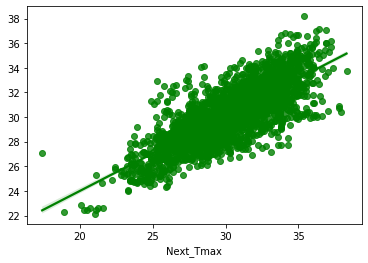

In [108]:
# Checking R2 score for SGD Regressor

SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

# Visualizing the predicted values
sns.regplot(y_test,predSGD,color="g")
plt.show()

Checking the cross validation score

In [109]:
from sklearn.model_selection import cross_val_score


In [110]:
# Checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9077398066600126


In [111]:
# Checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.7839204258450898


In [112]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7993494769918472


In [113]:
# Checking cv score for KNeighbors Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7612455063422792


In [114]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.8913079775922309


In [115]:
# Checking cv score for XGBRegressor
print(cross_val_score(XGB,x,y,cv=5).mean())

0.915402103234233


In [116]:
# Checking cv score for ExtraTreesRegressor
print(cross_val_score(XT,x,y,cv=5).mean())

0.9169204740183705


In [117]:
# Checking cv score for SGDRegressor
print(cross_val_score(SGD,x,y,cv=5).mean())

0.6270427680384587


Hyper parameter tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
#XGB Regressor

parameters = {'n_estimators' : [50,100,200, 400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}

In [128]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [129]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [130]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimators': 400, 'n_jobs': -2}

In [131]:
Final_model2 = xgb(gamma=0.0, max_depth=6, n_estimators=400, n_jobs=-2)
Final_model2.fit(x_train, y_train)
pred = Final_model2.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 90.49508365777933
RMSE value: 0.9468166161090995
MAE: 0.691221184209822
MSE: 0.8964617045402858


Saving the model

In [132]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model2,"Temperature_Forecast_Next_Tmin.pkl")

['Temperature_Forecast_Next_Tmin.pkl']

Predicting the saved model

In [133]:
# Loading the saved model
Model2=joblib.load("Temperature_Forecast_Next_Tmin.pkl")

#Prediction
prediction_Tmin = Model2.predict(x_test)
prediction_Tmin

array([32.014736, 32.20455 , 26.62255 , ..., 27.65047 , 36.452595,
       34.466087], dtype=float32)

In [134]:
pd.DataFrame([Model2.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

We have created a DataFrame of Actual and Predicted temperature values . Here Actual Next_Tmin and predicted Next_Tmin temperature values are almost same.

